<a href="https://colab.research.google.com/github/TejasreeL/Credit-Card-Default-Risk-Analysis/blob/main/Credit_card_default_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('defaults.csv')

In [9]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [10]:
df = df.drop(0)

In [11]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [12]:
df = df.astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  30000 non-null  int64
 1   X1          30000 non-null  int64
 2   X2          30000 non-null  int64
 3   X3          30000 non-null  int64
 4   X4          30000 non-null  int64
 5   X5          30000 non-null  int64
 6   X6          30000 non-null  int64
 7   X7          30000 non-null  int64
 8   X8          30000 non-null  int64
 9   X9          30000 non-null  int64
 10  X10         30000 non-null  int64
 11  X11         30000 non-null  int64
 12  X12         30000 non-null  int64
 13  X13         30000 non-null  int64
 14  X14         30000 non-null  int64
 15  X15         30000 non-null  int64
 16  X16         30000 non-null  int64
 17  X17         30000 non-null  int64
 18  X18         30000 non-null  int64
 19  X19         30000 non-null  int64
 20  X20         30000 non-null  

In [14]:
X = df.iloc[:, 1:24]

In [15]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [16]:
y = df['Y'].values.flatten()

In [17]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [19]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [20]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [23]:
import matplotlib.pyplot as plt

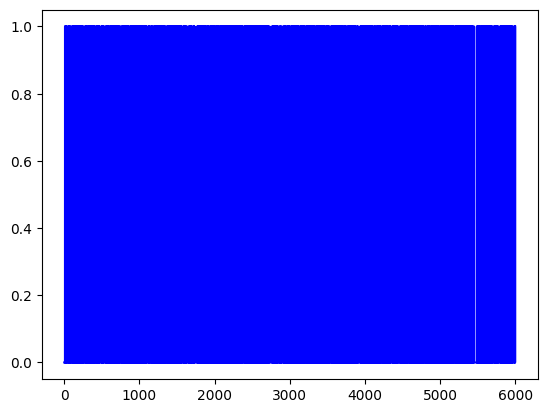

In [24]:
plt.plot(y_test, "b")
plt.show()

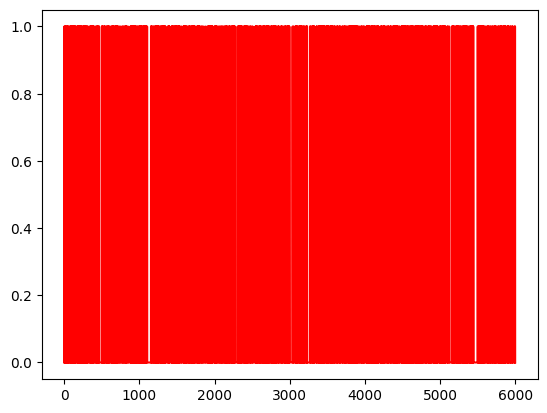

In [25]:

plt.plot(y_pred, "r")
plt.show()

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, y_pred)

0.8193333333333334

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix(y_test, y_pred)

array([[4405,  261],
       [ 823,  511]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4666
           1       0.66      0.38      0.49      1334

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
classifier = Sequential()
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=23))
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [42]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [45]:
classifier.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.7868
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4729 - accuracy: 0.7853
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7875
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7852
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4750 - accuracy: 0.7859
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7848
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7864
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7867
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7873
Epoch 10/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4730 - accura

In [46]:
y_pred = classifier.predict(X_test)

188/188 [==============================] - 1s 2ms/step


In [47]:
y_pred

array([[0.3345132 ],
       [0.5150288 ],
       [0.1636363 ],
       ...,
       [0.05178573],
       [0.2194413 ],
       [0.16313222]], dtype=float32)

In [49]:
binary_predictions = (y_pred > 0.5).astype(int)

In [50]:
binary_predictions

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
print("Accuracy:", accuracy_score(y_test, binary_predictions))
print(confusion_matrix(y_test, binary_predictions))
print(classification_report(y_test, binary_predictions))

Accuracy: 0.7793333333333333
[[4265  421]
 [ 903  411]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4686
           1       0.49      0.31      0.38      1314

    accuracy                           0.78      6000
   macro avg       0.66      0.61      0.62      6000
weighted avg       0.75      0.78      0.76      6000



In [55]:
from tensorflow.keras.initializers import HeNormal

In [56]:
classifier = Sequential()
classifier.add(Dense(units=32, kernel_initializer=HeNormal(), activation='relu', input_dim=23))
classifier.add(Dense(units=64, kernel_initializer=HeNormal(), activation='relu'))
classifier.add(Dense(units=10, kernel_initializer=HeNormal(), activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [58]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
classifier.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
240/240 [==============================] - 2s 2ms/step - loss: 45.3464 - accuracy: 0.6840
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 9.9302 - accuracy: 0.6955
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 5.6312 - accuracy: 0.6910
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 3.3983 - accuracy: 0.6877
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 1.4130 - accuracy: 0.6865
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 0.8177 - accuracy: 0.7107
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 0.7484 - accuracy: 0.7230
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7367
Epoch 9/100
240/240 [==============================] - 1s 2ms/step - loss: 0.6193 - accuracy: 0.7467
Epoch 10/100
240/240 [==============================] - 1s 2ms/step - loss: 0.5755 - accur

In [60]:
y_pred = classifier.predict(X_test)
binary_predictions = (y_pred > 0.5).astype(int)
binary_predictions

188/188 [==============================] - 1s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [61]:
print("Accuracy:", accuracy_score(y_test, binary_predictions))
print(confusion_matrix(y_test, binary_predictions))
print(classification_report(y_test, binary_predictions))

Accuracy: 0.781
[[4686    0]
 [1314    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4686
           1       0.00      0.00      0.00      1314

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 31)

In [63]:
classifier.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 2/100
270/270 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 3/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 4/100
270/270 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 5/100
270/270 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 7/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 8/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 9/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.7802
Epoch 10/100
270/270 [==============================] - 1s 2ms/step - loss: 0.5266 - accura

In [65]:
y_pred = classifier.predict(X_test)
binary_predictions = (y_pred > 0.5).astype(int)
binary_predictions

94/94 [==============================] - 0s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [66]:
print("Accuracy:", accuracy_score(y_test, binary_predictions))
print(confusion_matrix(y_test, binary_predictions))
print(classification_report(y_test, binary_predictions))

Accuracy: 0.766
[[2298    0]
 [ 702    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2298
           1       0.00      0.00      0.00       702

    accuracy                           0.77      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.59      0.77      0.66      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
y_pred = classifier.predict(X_train)
binary_predictions = (y_pred > 0.5).astype(int)
binary_predictions

844/844 [==============================] - 2s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [68]:
print("Accuracy:", accuracy_score(y_train, binary_predictions))
print(confusion_matrix(y_train, binary_predictions))
print(classification_report(y_train, binary_predictions))

Accuracy: 0.7802222222222223
[[21066     0]
 [ 5934     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     21066
           1       0.00      0.00      0.00      5934

    accuracy                           0.78     27000
   macro avg       0.39      0.50      0.44     27000
weighted avg       0.61      0.78      0.68     27000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
